# Predicting Customer Churn using ML methods

In [1]:
#import basic libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
dataset=pd.read_csv('Telcom Data.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.shape

(7043, 21)

In [4]:
dataset1=dataset.copy()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Total Charges given as object ,check for values
for i in dataset.columns:
    print('*************',i,'*************')
    print()
    print(set(dataset[i].tolist()))
    print()

************* customerID *************

{'5624-BQSSA', '7209-JCUDS', '1062-LHZOD', '2969-VAPYH', '7779-LGOVN', '0795-XCCTE', '2474-LCNUE', '1976-AZZPJ', '2796-UUZZO', '2034-CGRHZ', '4988-IQIGL', '3486-HOOGQ', '9283-LZQOH', '0302-JOIVN', '7129-AZJDE', '5312-UXESG', '0639-TSIQW', '1699-HPSBG', '4154-AQUGT', '1839-UMACK', '6655-LHBYW', '2162-FRZAA', '0702-PGIBZ', '8063-GBATB', '3943-KDREE', '1875-QIVME', '1064-FBXNK', '4884-TVUQF', '6243-OZGFH', '5144-TVGLP', '5827-MWCZK', '6797-UCJHZ', '5760-WRAHC', '8718-PTMEZ', '1775-KWJKQ', '6701-DHKWQ', '7025-IWFHT', '1471-GIQKQ', '5619-PTMIK', '6892-EZDTG', '9052-VKDUW', '6870-ZWMNX', '9644-UMGQA', '7797-EJMDP', '3023-GFLBR', '9470-RTWDV', '7096-UCLNH', '7079-QRCBC', '2135-DQWAQ', '8388-DMKAE', '0917-EZOLA', '8917-SZTTJ', '6366-ZGQGL', '9867-NNXLC', '0516-VRYBW', '6746-WAUWT', '1270-XKUCC', '2862-PFNIK', '3804-RVTGV', '8630-QSGXK', '2880-FPNAE', '0701-TJSEF', '9730-DRTMJ', '1971-DTCZB', '1582-RAFML', '1022-RKXDR', '9871-ELEYA', '0376-YMCJC', '0011-I

In [7]:
dataset['TotalCharges'].value_counts()   #11 space as values

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
dataset['TotalCharges']=dataset['TotalCharges'].replace(" ",np.nan)
dataset['TotalCharges']=dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

In [9]:
dataset['TotalCharges']=dataset['TotalCharges'].astype('float')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
dataset=dataset.drop(['customerID'],axis=1)

### Missing Values

In [12]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Outlier Treatment

In [13]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='TotalCharges'>

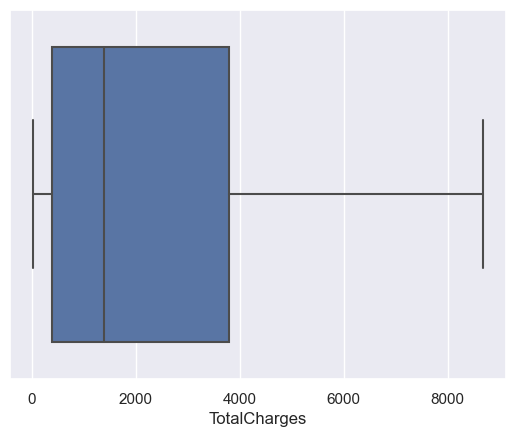

In [14]:
sns.boxplot(dataset['TotalCharges'])    #No outliers

# EDA

In [15]:
dataset.shape

(7043, 20)

In [16]:
dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [17]:
dataset['SeniorCitizen'].value_counts()    #most people are not senior citizen

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
dataset['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
dataset['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [20]:
dataset['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [21]:
dataset['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [22]:
dataset['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
dataset['Churn'].value_counts()   #imbalance dataset

No     5174
Yes    1869
Name: Churn, dtype: int64

In [24]:
#pandas profiling
from pandas_profiling import ProfileReport
report=ProfileReport(dataset)
report.to_file(output_file="Pandas Profiling EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Imbalance Treatment

In [25]:
dataset['Churn'].value_counts()/len(dataset)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [26]:
dataset['Churn']=dataset['Churn'].replace({'Yes':1,'No':0})
dataset['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Encoding

In [27]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
dataset=pd.get_dummies(dataset,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [29]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### Feature Scaling

In [30]:
#required in tenure, MonthlyCharges, TotalCharges

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_columns=['tenure','MonthlyCharges','TotalCharges']
dataset[scaler_columns]=scaler.fit_transform(dataset[scaler_columns])
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Split data into I.V. and D.V

In [32]:
x=dataset.drop(['Churn'],axis=1)
y=dataset['Churn']
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

## Handling imbalance (SMOTE)

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm=smote.fit_resample(x,y)
print(y.value_counts())
print("************************")
print(y_sm.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64
************************
0    5174
1    5174
Name: Churn, dtype: int64


In [35]:
print(x.shape)
print("************")
print(x_sm.shape)

(7043, 30)
************
(10348, 30)


## Split the data into training and test

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=101)

# Model Building

## 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [38]:
#predict result
y_pred_logit_train=logit.predict(x_train)
y_pred_logit_test=logit.predict(x_test)

In [39]:
#evaluate the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred_logit_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1560
           1       0.79      0.86      0.82      1545

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



In [40]:
print('Confusion matrix is :')
print(confusion_matrix(y_test,y_pred_logit_test))

Confusion matrix is :
[[1208  352]
 [ 221 1324]]


In [41]:
print("Training Accuracy is :",accuracy_score(y_train,y_pred_logit_train))
print("Test Accuracy is :",accuracy_score(y_test,y_pred_logit_test))

Training Accuracy is : 0.7987021952229739
Test Accuracy is : 0.8154589371980676


In [42]:
#good accuracy,no bias and variance
#precision- 0.81
#recall - 0.81

## Probability that customers will churn

In [43]:
dataset['Probability']=logit.predict_proba(dataset[x_test.columns])[:,1]

In [44]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Probability
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0.778890
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0.106710
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0.291422
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.104462
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0.901783


In [48]:
dataset2=pd.concat([dataset1['customerID'],dataset['Probability']],axis=1)
#datset2=dataset1['customerID']+dataset['Probability']
dataset2.head()

,customerID,Probability
0,7590-VHVEG,0.778890
1,5575-GNVDE,0.106710
2,3668-QPYBK,0.291422
3,7795-CFOCW,0.104462
4,9237-HQITU,0.901783


### ROC-AUC

In [49]:
from sklearn.metrics import roc_auc_score
logit_roc_auc=roc_auc_score(y_test,y_pred_logit_test)
print(logit_roc_auc)                   # 81% accuracy

0.8156584515807818


In [50]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_logit_test)

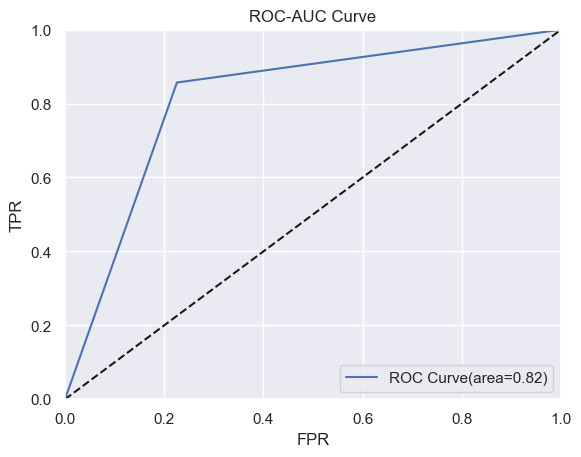

In [51]:
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
#ROC curve above AUC, good model

## 2. Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')   #criterion gini / entropy, check whichever gives better accuracy
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
y_pred_dt_train=dtree.predict(x_train)
y_pred_dt_test=dtree.predict(x_test)

In [58]:
print("Training Accuracy is :",accuracy_score(y_train,y_pred_dt_train))
print("Test Accuracy is :",accuracy_score(y_test,y_pred_dt_test))

Training Accuracy is : 0.9987574209581666
Test Accuracy is : 0.7758454106280194


In [59]:
#high variance (DT is overfitting the model) ---- solution- Bagging

## 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=101)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=101)

In [61]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

In [62]:
print("Training Accuracy is :",accuracy_score(y_train,y_pred_rf_train))
print("Test Accuracy is :",accuracy_score(y_test,y_pred_rf_test))  #(variance less than 15% now)

Training Accuracy is : 0.9987574209581666
Test Accuracy is : 0.8553945249597423


In [63]:
#Cross validation or XGBoost now for improving model more

## 4. XGBoost

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
#predict
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)

In [74]:
#evaluate
print('Train accuracy: ',accuracy_score(y_train,y_pred_xgb_train))
print('Test accuracy: ',accuracy_score(y_test,y_pred_xgb_test))

Train accuracy:  0.9486400662708823
Test accuracy:  0.8312399355877617


## 5.AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=100,random_state=101)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

In [76]:
#predict
y_pred_ada_train=adaboost.predict(x_train)
y_pred_ada_test=adaboost.predict(x_test)

In [77]:
#evaluate
print('Train accuracy: ',accuracy_score(y_train,y_pred_ada_train))
print('Test accuracy: ',accuracy_score(y_test,y_pred_ada_test))

Train accuracy:  0.794008007731603
Test accuracy:  0.8054750402576489


## 6.PyCaret Package

In [78]:
from pycaret.classification import *

In [79]:
classif=setup(data=dataset,target='Churn',session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 32)"
4,Transformed data shape,"(7043, 32)"
5,Transformed train set shape,"(4930, 32)"
6,Transformed test set shape,"(2113, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [80]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8022,0.8449,0.5520,0.6521,0.5974,0.4675,0.4707,0.5480
ada,Ada Boost Classifier,0.7990,0.8410,0.5131,0.6563,0.5745,0.4458,0.4524,0.1760
ridge,Ridge Classifier,0.7984,0.0000,0.5528,0.6416,0.5929,0.4600,0.4629,0.0110
lda,Linear Discriminant Analysis,0.7984,0.8412,0.5925,0.6291,0.6096,0.4740,0.4748,0.0300
gbc,Gradient Boosting Classifier,0.7980,0.8436,0.5123,0.6526,0.5730,0.4434,0.4496,0.4670
lightgbm,Light Gradient Boosting Machine,0.7895,0.8297,0.5131,0.6270,0.5629,0.4264,0.4310,0.2730
rf,Random Forest Classifier,0.7874,0.8244,0.4840,0.6309,0.5469,0.4113,0.4180,0.2560
svm,SVM - Linear Kernel,0.7809,0.0000,0.4596,0.6389,0.5007,0.3756,0.3958,0.0170
xgboost,Extreme Gradient Boosting,0.7803,0.8205,0.5070,0.6032,0.5499,0.4063,0.4096,0.4930
et,Extra Trees Classifier,0.7732,0.8080,0.4695,0.5923,0.5223,0.3767,0.3818,0.2670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
#best model- logistic reg
logistic=create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7870,0.8425,0.5538,0.6050,0.5783,0.4362,0.4370
1,0.7931,0.8285,0.5538,0.6207,0.5854,0.4481,0.4494
2,0.8053,0.8202,0.5725,0.6522,0.6098,0.4808,0.4826
3,0.7992,0.8427,0.5344,0.6481,0.5858,0.4549,0.4586
4,0.7688,0.8235,0.5191,0.5714,0.5440,0.3896,0.3904
5,0.7951,0.8342,0.5420,0.6339,0.5844,0.4495,0.4520
6,0.8174,0.8666,0.5725,0.6881,0.6250,0.5057,0.5094
7,0.8053,0.8586,0.5420,0.6636,0.5966,0.4700,0.4742
8,0.8235,0.8659,0.5725,0.7075,0.6329,0.5185,0.5235


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
#further tuning
tuned=tune_model(logistic)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7890,0.8426,0.5615,0.6083,0.5840,0.4430,0.4436
1,0.7951,0.8286,0.5538,0.6261,0.5878,0.4521,0.4536
2,0.8032,0.8209,0.5649,0.6491,0.6041,0.4740,0.4760
3,0.8012,0.8432,0.5420,0.6514,0.5917,0.4618,0.4652
4,0.7728,0.8234,0.5267,0.5798,0.5520,0.4003,0.4011
5,0.7951,0.8335,0.5496,0.6316,0.5878,0.4523,0.4543
6,0.8195,0.8679,0.5725,0.6944,0.6276,0.5099,0.5141
7,0.8053,0.8590,0.5344,0.6667,0.5932,0.4673,0.4722
8,0.8235,0.8662,0.5725,0.7075,0.6329,0.5185,0.5235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…